In [2]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import re
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta

#**Alumni - Politécnica - São Paulo.**<br>

**Relatório:** https://docs.google.com/document/d/15n9eHBz0bUo1qT39uhw3EGgxvqeu9XLZlivXs93dNOo/edit?usp=sharing

Atualização: 08/12/2021 <br>

Responsável: Gustavo de Andrade<br>
gustavo@if.usp.br
<br>


#**O primeiro dataframe é do "Acesso à plafatorma - Primeiro Acesso"**

In [3]:
dados = pd.read_csv("Dashboard Alumni USP_Primeiro Acesso_Tabela dinâmica.csv")

In [4]:
dados

,Y,M,D,login_status,genre,Record Count
0,2017,6,22,Complete,Female,2
1,2020,3,24,Complete,Male,2
2,2017,3,6,Complete,Male,2
3,2018,9,28,Complete,Female,2
4,2015,12,4,Complete,Male,2
...,...,...,...,...,...,...
2887,2021,11,3,Incomplete,Male,1
2888,2021,12,5,Complete,Male,1
2889,2021,11,19,Complete,Male,1
2890,2021,12,3,Incomplete,Male,1


In [5]:
dados1 = pd.DataFrame()
dados1['anos'] = dados['Y']
dados1['total'] = dados['Record Count']

In [6]:
dados1

,anos,total
0,2017,2
1,2020,2
2,2017,2
3,2018,2
4,2015,2
...,...,...
2887,2021,1
2888,2021,1
2889,2021,1
2890,2021,1


In [7]:
evol = pd.DataFrame()
evol['total'] = dados.groupby(['Y'], as_index = True )['Record Count'].sum()
evol = pd.DataFrame(evol)
evol

,total
Y,
2015,417
2016,615
2017,1699
2018,1734
2019,1177
2020,1797
2021,1360


In [84]:
evol = pd.DataFrame([[1032],[2731],[4465],[5642],[7439],[8799]], columns=['Total'], index=["2016", "2017","2018","2019","2020","2021"])
evol

,Total
2016,1032
2017,2731
2018,4465
2019,5642
2020,7439
2021,8799


Text(0.5, 1.0, 'Inscritros no ALUMNI - Escola Politécnica - São Paulo')

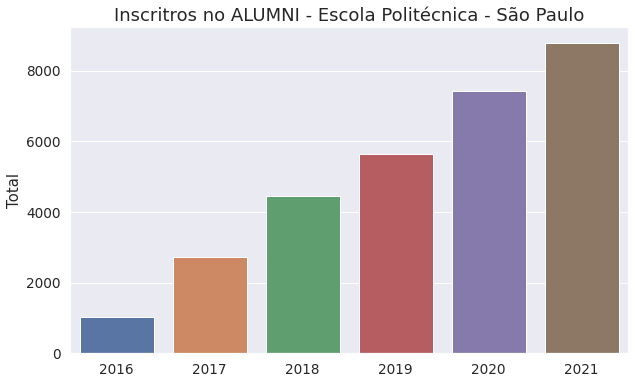

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=evol, x=evol.index, y='Total')
plt.title('Inscritros no ALUMNI - Escola Politécnica - São Paulo', fontsize=18)

Text(0.5, 1.0, 'Inscritros no ALUMNI - Escola Politécnica - São Paulo')

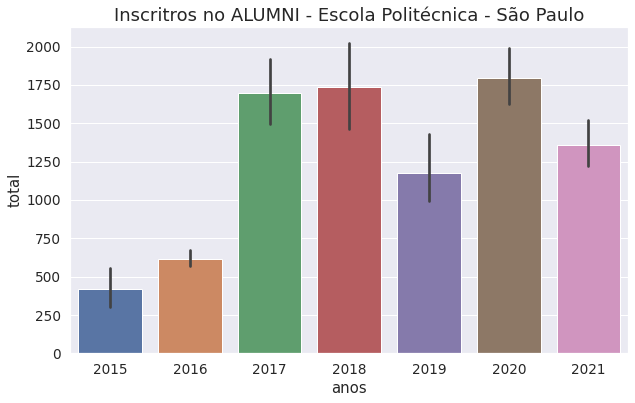

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dados1, x='anos', y='total', estimator=sum)
plt.title('Inscritros no ALUMNI - Escola Politécnica - São Paulo', fontsize=18)

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Y             2892 non-null   int64 
 1   M             2892 non-null   int64 
 2   D             2892 non-null   int64 
 3   login_status  2892 non-null   object
 4   genre         2892 non-null   object
 5   Record Count  2892 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 135.7+ KB


In [12]:
n = 0
data_e_hora_em_texto = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])

In [13]:
data_e_hora_em_texto

'2017-6-22'

In [14]:
n = 0    
lista = []
while n < len(dados):
    lista_insert = str(dados['Y'][n]) + '-' + str(dados['M'][n]) +  '-' + str(dados['D'][n])
    lista.insert(n, lista_insert)
    n += 1

In [15]:
dados['data'] = lista

In [16]:
dados['data'] = dados['data'].astype('datetime64[ns]')
dados

,Y,M,D,login_status,genre,Record Count,data
0,2017,6,22,Complete,Female,2,2017-06-22
1,2020,3,24,Complete,Male,2,2020-03-24
2,2017,3,6,Complete,Male,2,2017-03-06
3,2018,9,28,Complete,Female,2,2018-09-28
4,2015,12,4,Complete,Male,2,2015-12-04
...,...,...,...,...,...,...,...
2887,2021,11,3,Incomplete,Male,1,2021-11-03
2888,2021,12,5,Complete,Male,1,2021-12-05
2889,2021,11,19,Complete,Male,1,2021-11-19
2890,2021,12,3,Incomplete,Male,1,2021-12-03


In [17]:
data_dados = pd.DataFrame()
data_dados

""


In [18]:
data_dados['total'] = dados.groupby(['data'])['Record Count'].sum()
data_dados

,total
data,
2015-09-02,1
2015-09-03,3
2015-09-04,1
2015-09-08,1
2015-09-11,1
...,...
2021-12-03,6
2021-12-04,1
2021-12-05,1


In [19]:
fig = px.area(dados, facet_col="genre",  x='data', y='Record Count')
fig.update_layout(bargap=0.1)
fig.show()

In [20]:
fig = px.area(dados, x='data', y='Record Count')
fig.show()

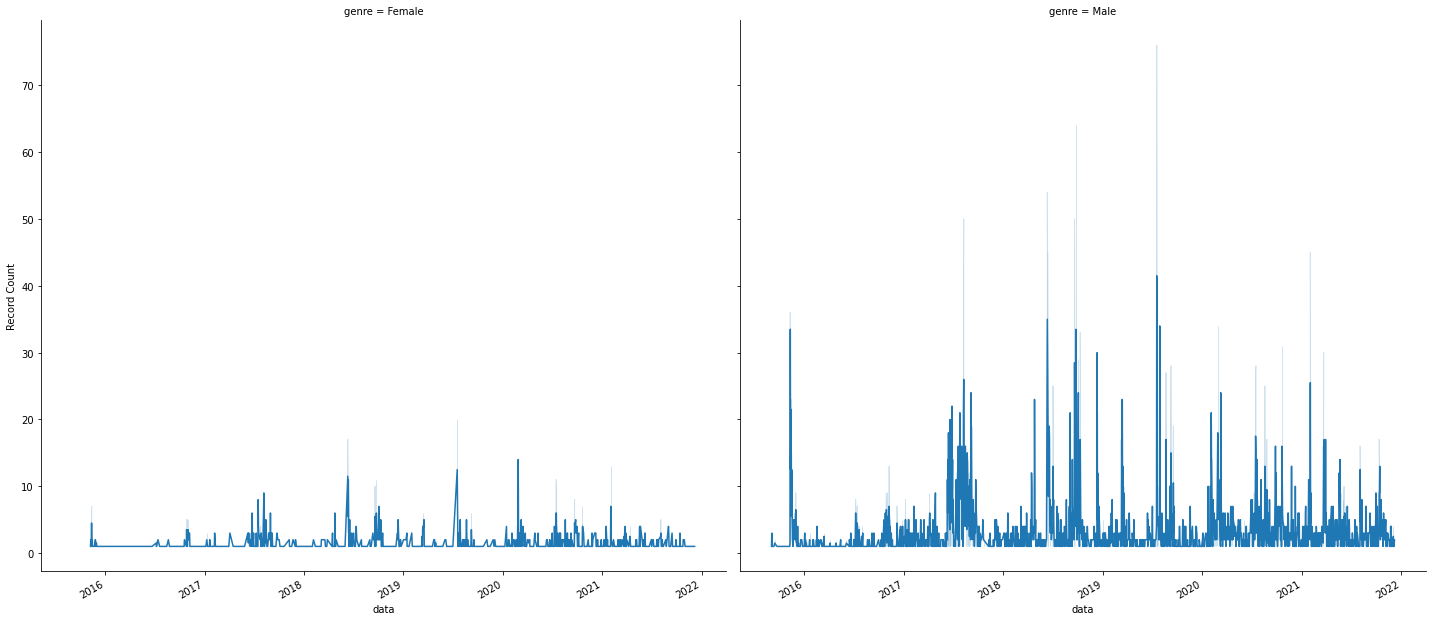

In [21]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, col="genre", height=10)
g.figure.autofmt_xdate()

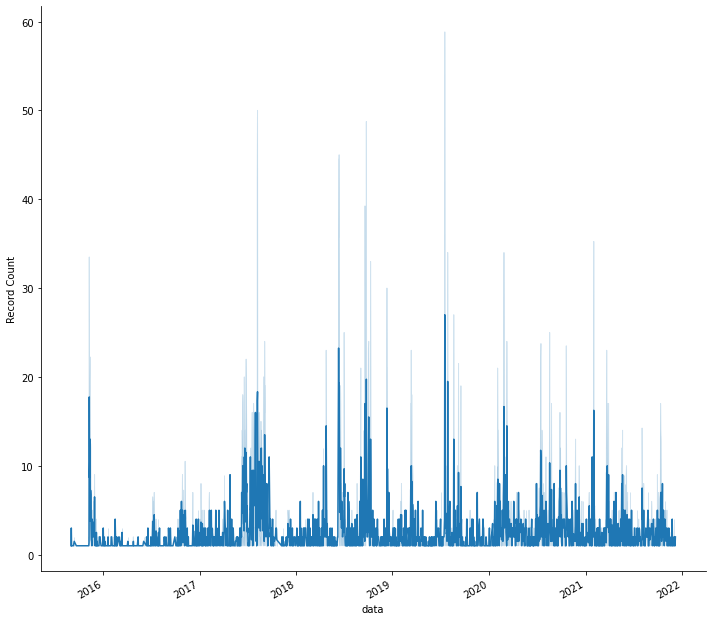

In [22]:
g = sns.relplot(x="data", y="Record Count", kind="line", data=dados, height=10)
g.figure.autofmt_xdate()

In [23]:
dados['mes_ano'] = dados['data'].map(lambda x: 100*x.year + x.month)
dados_mes = dados.groupby(['mes_ano'])['Record Count'].sum().reset_index()

In [24]:
dados

,Y,M,D,login_status,genre,Record Count,data,mes_ano
0,2017,6,22,Complete,Female,2,2017-06-22,201706
1,2020,3,24,Complete,Male,2,2020-03-24,202003
2,2017,3,6,Complete,Male,2,2017-03-06,201703
3,2018,9,28,Complete,Female,2,2018-09-28,201809
4,2015,12,4,Complete,Male,2,2015-12-04,201512
...,...,...,...,...,...,...,...,...
2887,2021,11,3,Incomplete,Male,1,2021-11-03,202111
2888,2021,12,5,Complete,Male,1,2021-12-05,202112
2889,2021,11,19,Complete,Male,1,2021-11-19,202111
2890,2021,12,3,Incomplete,Male,1,2021-12-03,202112


In [25]:
dados_mes = dados_mes.append(dados_mes)

In [26]:
dados_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 0 to 75
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mes_ano       152 non-null    int64
 1   Record Count  152 non-null    int64
dtypes: int64(2)
memory usage: 3.6 KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text major ticklabel objects>)

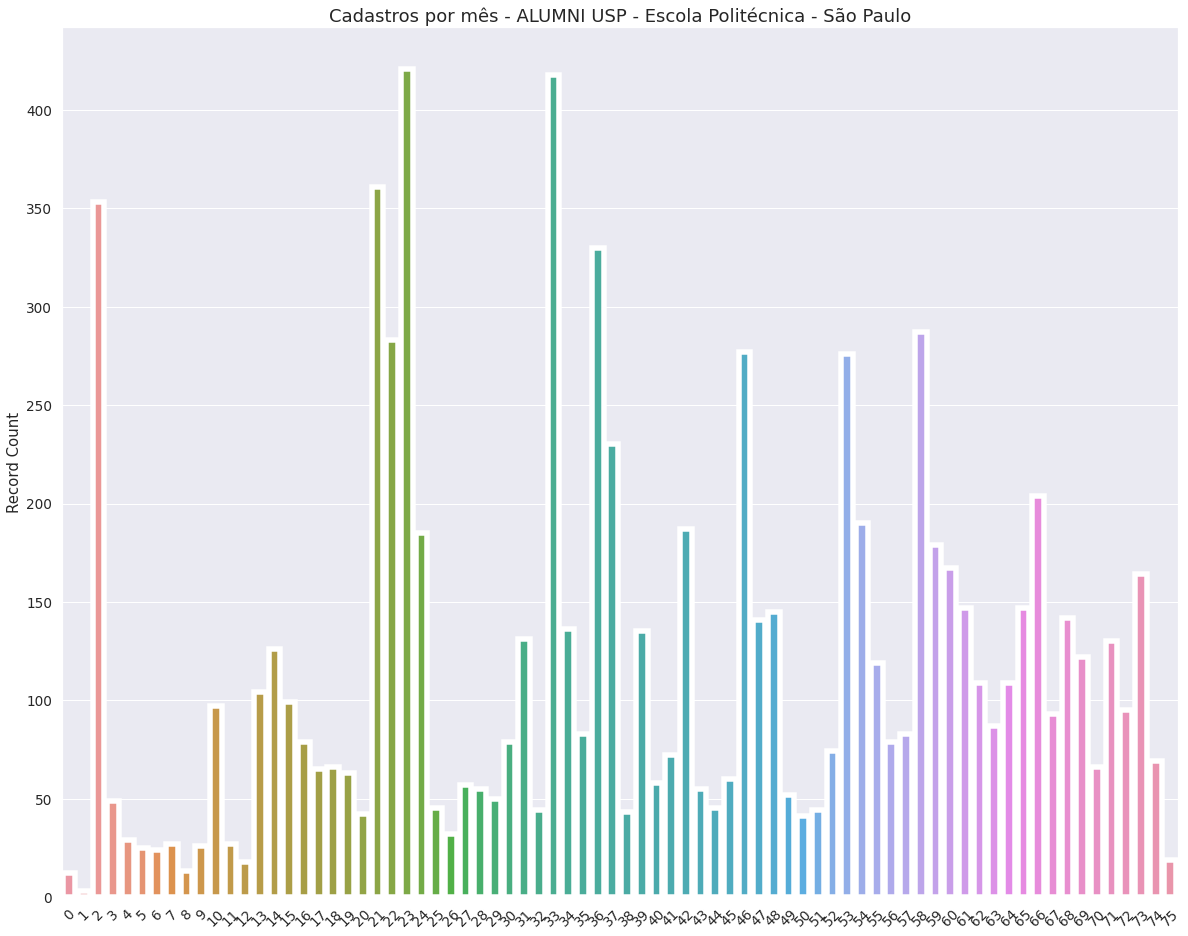

In [88]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano.index, y='Record Count',
                 linewidth=5.5)
plt.title('Cadastros por mês - ALUMNI USP - Escola Politécnica - São Paulo', fontsize=18)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75]),
 <a list of 76 Text major ticklabel objects>)

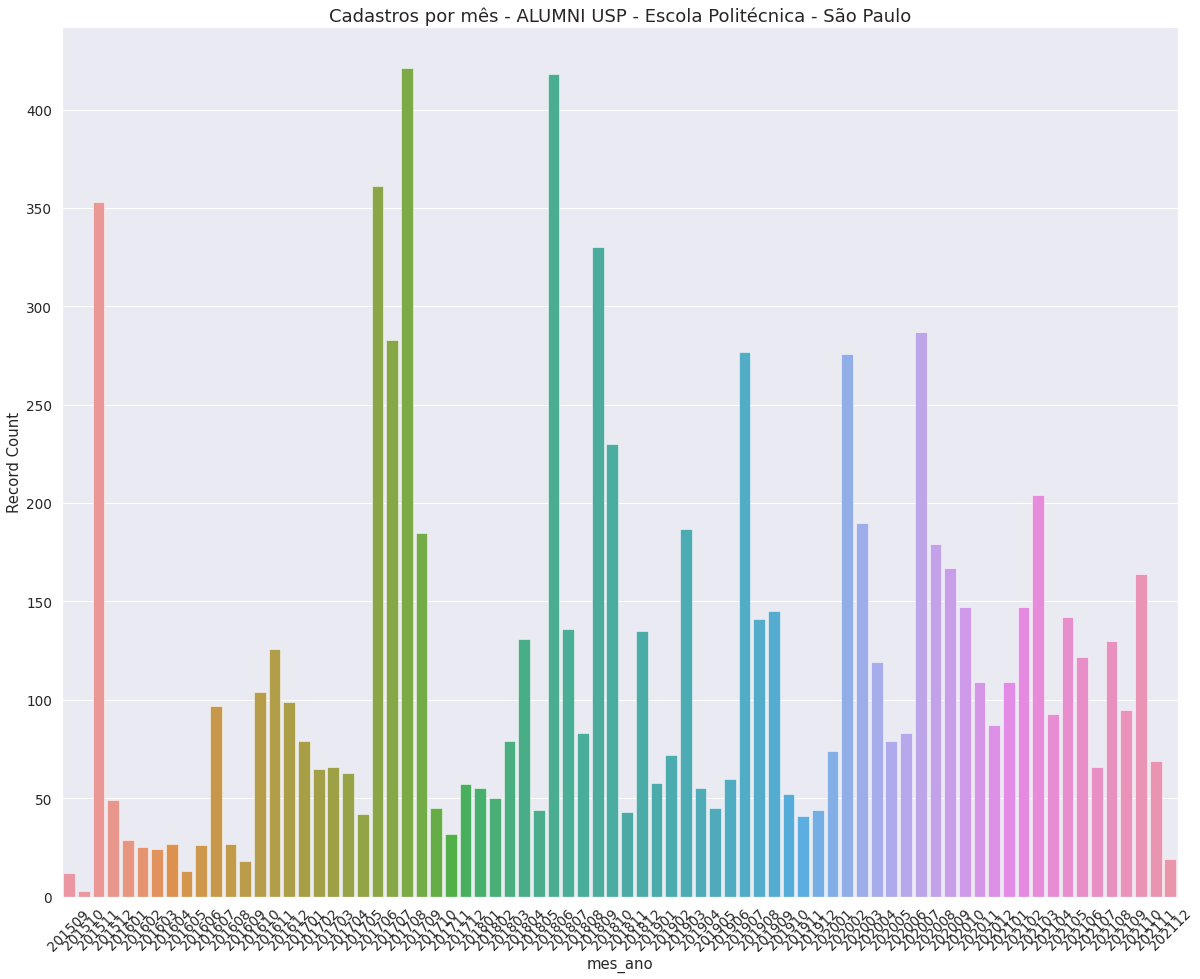

In [93]:
plt.figure(figsize=(20,16))
sns.barplot(data=dados_mes, x=dados_mes.mes_ano, y='Record Count',
                 linewidth=0.5)
plt.title('Cadastros por mês - ALUMNI USP - Escola Politécnica - São Paulo', fontsize=18)
plt.xticks(rotation=45)

In [29]:
login_status_estat = dados.groupby(['login_status'])['Record Count'].sum()
login_status_estat 

login_status
Complete      7983
Incomplete     816
Name: Record Count, dtype: int64

(-1.1073449073709798,
 1.106997612933829,
 -1.1059001181995631,
 1.1002809675518341)

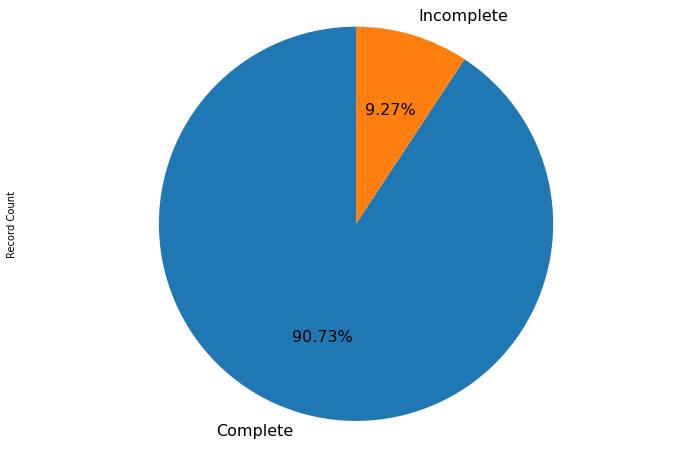

In [30]:
fig = plt.figure(figsize=(12, 8))
login_status_estat.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [31]:
group_record_count_y = dados.groupby(['Y'])['Record Count'].sum()

In [32]:
group_record_count_y

Y
2015     417
2016     615
2017    1699
2018    1734
2019    1177
2020    1797
2021    1360
Name: Record Count, dtype: int64

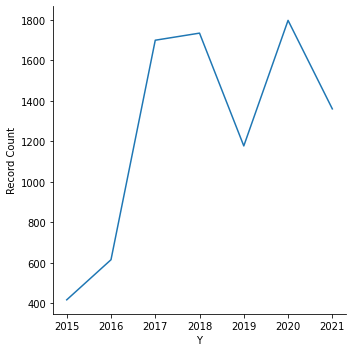

In [33]:
sns.relplot( ci="sd", kind="line", data=group_record_count_y);

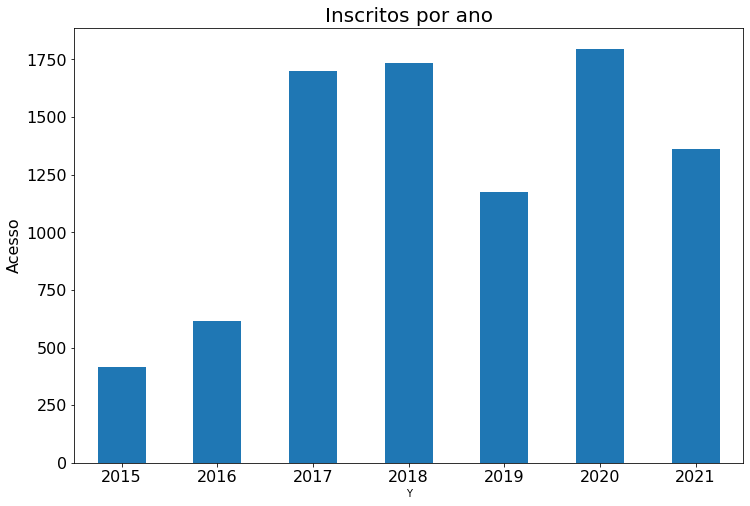

In [34]:
plt.figure(figsize=(12, 8))
group_record_count_y.plot(kind='bar')
plt.title('Inscritos por ano', fontsize=20)
plt.ylabel('Acesso', fontsize=16)
plt.tick_params(labelsize=16)
plt.xticks(rotation=0)
plt.show()

#**O segundo dataframe é do "Acessos à plafatorma - Abrangência"**

In [35]:
dados2 = pd.read_csv("Dashboard Alumni USP_Acesso - Abrangência_Tabela.csv")

In [36]:
dados2

,institution,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,Escola Politécnica,30008,21209,8799,0.293222,7983,0.907262


In [37]:
ranking_inscritos = pd.DataFrame()
ranking_inscritos['unidades'] = dados2['institution']
ranking_inscritos['total'] = dados2['is_active']
ranking_inscritos = ranking_inscritos.sort_values(['total'],ascending=False)
ranking_inscritos

,unidades,total
0,Escola Politécnica,8799


In [38]:
inscritos_alumni = ranking_inscritos['total'].sum() 
inscritos_alumni

8799

Total verificado! corresponde perfeito!

Filtrando

In [39]:
ranking_inscritos_abs_top = ranking_inscritos[:10] 
ranking_inscritos_abs_top.to_excel('ranking_inscritos_abs_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_abs_top

,unidades,total
0,Escola Politécnica,8799


**Total de formados**

In [40]:
formados_total = pd.DataFrame()
formados_total['unidades'] = dados2['institution']
formados_total['total'] = dados2['total_active_inactive']
formados_total = formados_total.sort_values(['total'],ascending=False)
formados_total

,unidades,total
0,Escola Politécnica,30008


In [41]:
formados = formados_total['total'].sum() 
formados

30008

In [42]:
ranking_inscritos_rel = pd.DataFrame()
ranking_inscritos_rel['unidades'] = dados2['institution']
ranking_inscritos_rel['total'] = dados2['perc_active']
ranking_inscritos_rel = ranking_inscritos_rel.sort_values(['total'],ascending=False)
ranking_inscritos_rel

,unidades,total
0,Escola Politécnica,0.293222


In [43]:
ranking_inscritos_rel_top = ranking_inscritos_rel[:10] 
ranking_inscritos_rel_top['total'] = ranking_inscritos_rel_top['total']*100
ranking_inscritos_rel_top.to_excel('ranking_inscritos_rel_top.xlsx', sheet_name='Sheet1')
ranking_inscritos_rel_top

,unidades,total
0,Escola Politécnica,29.322181


**Perfil completo ou incompleto - Total**

In [44]:
ranking_perfil_completo = pd.DataFrame()
ranking_perfil_completo['unidades'] = dados2['institution']
ranking_perfil_completo['total'] = dados2['is_complete']
ranking_perfil_completo = ranking_perfil_completo.sort_values(['total'],ascending=False)
ranking_perfil_completo

,unidades,total
0,Escola Politécnica,7983


**Perfil completo ou incompleto - Relativo**

In [45]:
ranking_perfil_completo_rel = pd.DataFrame()
ranking_perfil_completo_rel['unidades'] = dados2['institution']
ranking_perfil_completo_rel['total'] = dados2['perc_complete']
ranking_perfil_completo_rel = ranking_perfil_completo_rel.sort_values(['total'],ascending=False)
ranking_perfil_completo_rel

,unidades,total
0,Escola Politécnica,0.907262


#**O Terceiro DataFrame é:"Acessos à plafatorma - Demográfico"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [46]:
dados3_1 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela.csv")
dados3_2 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Tabela dinâmica.csv")
dados3_3 = pd.read_csv("Dashboard Alumni USP_Acesso  - Demográfico_Gráfico de pizza.csv")

In [47]:
dados3_1

,periodstartyear,total_active_inactive,is_inactive,is_active,perc_active,is_complete,perc_complete
0,2020,7,0,7,1.000000,7,1.000000
1,2019,43,18,25,0.581395,22,0.880000
2,2018,124,34,90,0.725806,83,0.922222
3,2017,220,65,155,0.704545,151,0.974194
4,2016,377,138,239,0.633952,227,0.949791
5,2015,671,223,448,0.667660,430,0.959821
6,2014,789,258,531,0.673004,513,0.966102
7,2013,809,335,474,0.585909,448,0.945148
8,2012,811,352,459,0.565968,430,0.936819
9,2011,830,430,400,0.481928,374,0.935000


In [48]:
dados3_2

,age,Record Count,Record Count.1
0,Entre 41 e 50,1627,0.184907
1,Entre 61 e 70,504,0.057279
2,Entre 31 e 40,3273,0.371974
3,Entre 51 e 60,906,0.102966
4,Entre 26 e 30,1892,0.215024
5,Entre 71 e 80,54,0.006137
6,Entre 81 e 90,3,0.000341
7,Entre 91 ou mais,7,0.000796
8,Entre 21 e 25,533,0.060575


In [49]:
dados3_3

,genre,Record Count
0,Male,25103
1,Female,4905


#**O quinto DataFrame é: "Status Profissional"**<br>
Essa parte no dashboard divide em duas tabelas, no qual podemos exportar dois csv, logo, são dois arquivos.

In [50]:
dados5 = pd.read_csv("Dashboard Alumni USP_Status Profissional_Tabela dinâmica.csv")

In [51]:
dados5

,prof_status,Y,Record Count
0,-,2017,1109
1,Sou Empreendedor,2020,123
2,Sou Empreendedor,2018,165
3,Sou Empregado ou Servidor Público,2015,67
4,Sou Empregado ou Servidor Público,2020,574
...,...,...,...
89,Sou Pós-doutorando,2016,1
90,Sou Servidor Público Municipal,2018,3
91,Procuro meu Primeiro Emprego,2017,1
92,Nenhuma das anteriores,2015,1


In [52]:
prof_status_total = dados5.groupby(by="prof_status")['Record Count'].sum().sort_values(ascending=False)
prof_status_total

prof_status
Sou Empregado ou Servidor Público    3067
Sou Empregado                        1613
-                                    1382
Sou Empreendedor                      607
Estou Procurando Emprego              255
Sou Profissional Liberal              236
Sou Estudante com Bolsa               153
Sou Estudante                         152
Sou Servidor Público Federal          149
Sou Servidor Público Estadual         103
Procuro meu Primeiro Emprego           84
Estou Aposentado                       61
Nenhuma das anteriores                 57
Sou Pós-doutorando                     41
Sou Servidor Público Municipal         23
Name: Record Count, dtype: int64

In [53]:
dados5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prof_status   94 non-null     object
 1   Y             94 non-null     int64 
 2   Record Count  94 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ KB


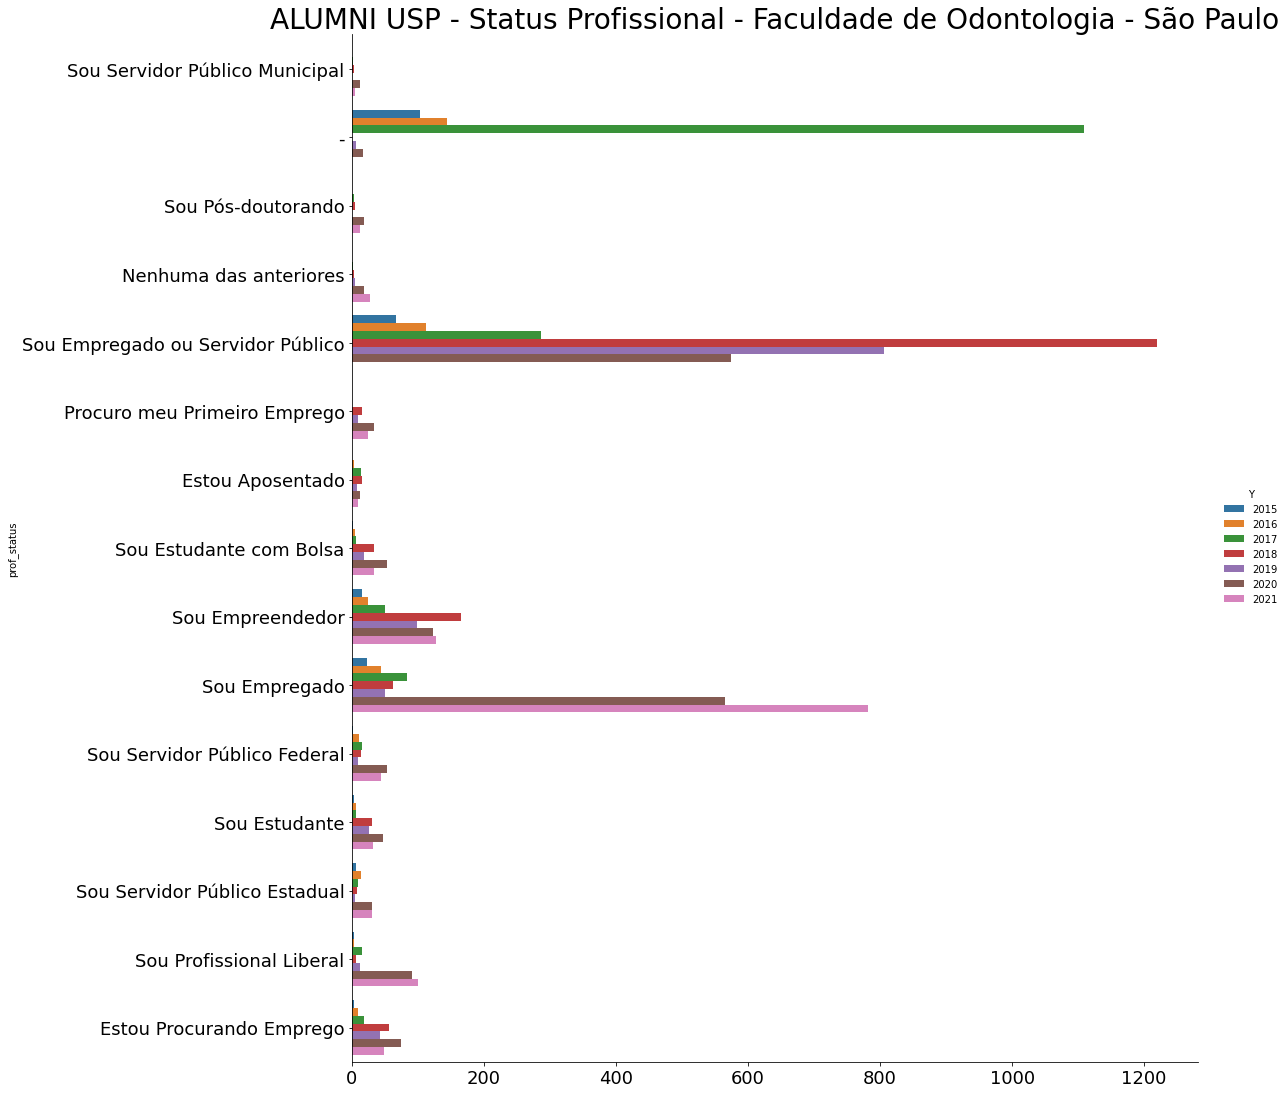

In [54]:
sns.catplot( y="prof_status", x="Record Count", hue="Y", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('ALUMNI USP - Status Profissional - Faculdade de Odontologia - São Paulo', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

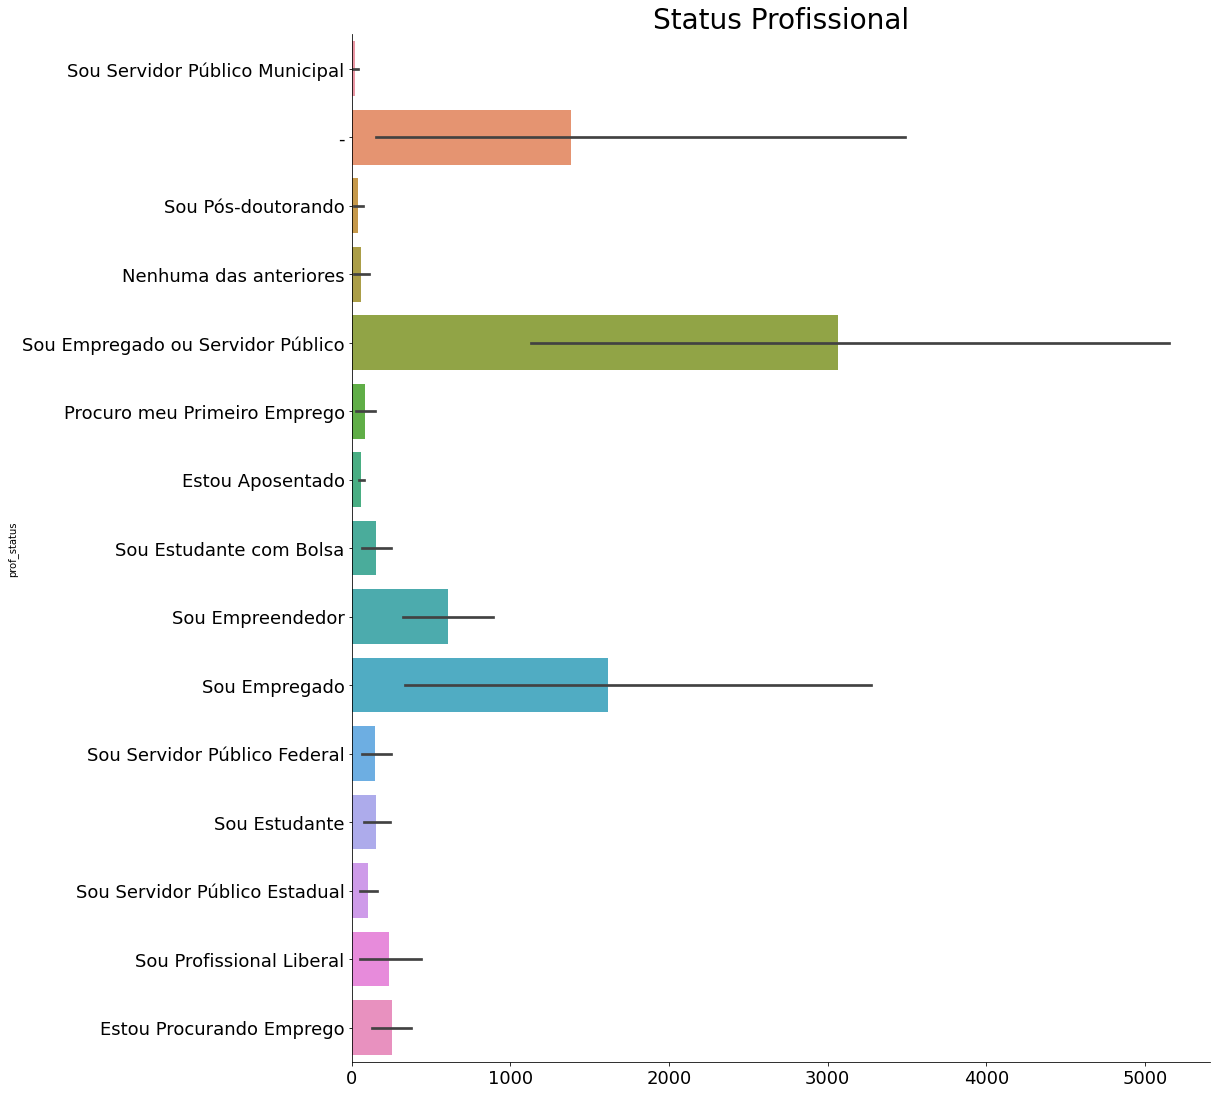

In [55]:
sns.catplot( y="prof_status", x="Record Count", estimator=np.sum, order = dados5['prof_status'].value_counts().sort_values(ascending=True).index,
            kind="bar", 
            data=dados5, height=15)
plt.title('Status Profissional', fontsize=28)
plt.xlabel('', fontsize=20)
plt.tick_params(labelsize=18)
plt.show()

#**O sexto DataFrame é: "Área de Atuação"**


In [56]:
dados6 = pd.read_csv("Dashboard Alumni USP_Área de Atuação_Tabela dinâmica.csv")

In [57]:
dados6

,prof_field,Y,Record Count
0,-,2017,1109
1,na mesma área de todas minhas formações na USP,2020,493
2,na mesma área da minha Graduação na USP,2018,8
3,em outra área,2015,31
4,na mesma área de todas minhas formações na USP,2018,949
5,na mesma área de todas minhas formações na USP,2015,76
6,na mesma área da minha Graduação na USP,2020,306
7,na mesma área da minha Graduação na USP,2017,30
8,em outra área,2019,316
9,na mesma área de todas minhas formações na USP,2019,648


Total de respostas:

In [58]:
dados6['Record Count'].sum()


7983

In [59]:
area_atuacao = pd.DataFrame()
area_atuacao['unidades'] = dados6['prof_field']
area_atuacao['total'] = dados6['Record Count']
area_atuacao = area_atuacao.sort_values(['total'],ascending=False)
area_atuacao

,unidades,total
0,-,1109
4,na mesma área de todas minhas formações na USP,949
9,na mesma área de todas minhas formações na USP,648
23,em outra área,573
14,em outra área,527
16,em outra área,506
1,na mesma área de todas minhas formações na USP,493
12,na mesma área da minha Graduação na USP,423
8,em outra área,316
6,na mesma área da minha Graduação na USP,306


In [60]:
area_atuacao = area_atuacao.groupby(['unidades'])['total'].sum().sort_values(ascending=False)
area_atuacao 

unidades
na mesma área de todas minhas formações na USP    2676
em outra área                                     2128
-                                                 1382
na mesma área da minha Graduação na USP            804
na mesma área da minha Pós-Graduação na USP        543
não atuo profissionalmente                         450
Name: total, dtype: int64

In [61]:
area_atuacao = pd.DataFrame(area_atuacao)

In [62]:
area_atu = pd.DataFrame() 
area_atu = area_atu.append(area_atuacao.loc[:])

In [63]:
area_atu.to_excel('area_atuacao.xlsx', sheet_name='Sheet1')

In [64]:
area_atu = pd.read_excel('area_atuacao.xlsx')  

In [65]:
area_atu

,unidades,total
0,na mesma área de todas minhas formações na USP,2676
1,em outra área,2128
2,-,1382
3,na mesma área da minha Graduação na USP,804
4,na mesma área da minha Pós-Graduação na USP,543
5,não atuo profissionalmente,450


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 



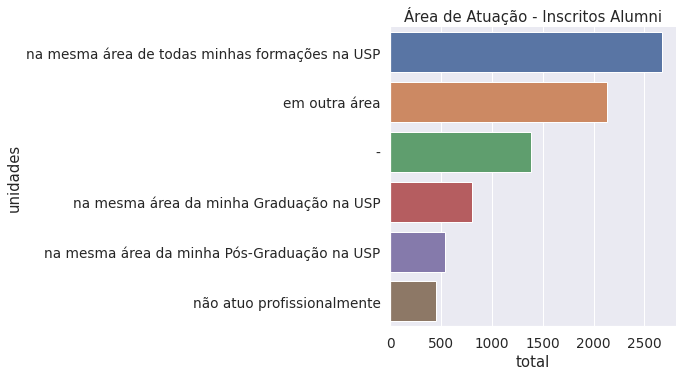

In [66]:
sns.set(font_scale = 1.24)
g = sns.catplot(data= area_atu, y='unidades',x='total', kind="bar")
g.set(title = "Área de Atuação - Inscritos Alumni")

#**O sétimo DataFrame é: " Área de Atuação - por Instituição"**

Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica

In [67]:
dados7 = pd.read_csv("Dashboard Alumni USP_Área de Atuação - Instituição_Tabela dinâmica.csv")

In [68]:
dados7

,institution,prof_field,Record Count
0,Escola Politécnica,-,1382
1,Escola Politécnica,na mesma área de todas minhas formações na USP,2676
2,Escola Politécnica,na mesma área da minha Graduação na USP,804
3,Escola Politécnica,em outra área,2128
4,Escola Politécnica,na mesma área da minha Pós-Graduação na USP,543
5,Escola Politécnica,não atuo profissionalmente,450


In [69]:
dados7['prof_field'].unique()

array(['-', 'na mesma área de todas minhas formações na USP',
       'na mesma área da minha Graduação na USP', 'em outra área',
       'na mesma área da minha Pós-Graduação na USP',
       'não atuo profissionalmente'], dtype=object)

In [70]:
mask = dados7['institution'].value_counts().head().index

In [71]:
area_atuacao_intuicao = dados7.groupby(['institution'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_intuicao 

institution
Escola Politécnica    7983
Name: Record Count, dtype: int64

In [72]:
area_atuacao_intuicao_field = pd.DataFrame()
area_atuacao_intuicao_field['total'] = dados7.groupby(['institution','prof_field'])['Record Count'].sum()
area_atuacao_intuicao_field

total
institution        prof_field                                           
Escola Politécnica -                                                1382
                   em outra área                                    2128
                   na mesma área da minha Graduação na USP           804
                   na mesma área da minha Pós-Graduação na USP       543
                   na mesma área de todas minhas formações na USP   2676
                   não atuo profissionalmente                        450

Confere!

In [73]:
area_atuacao_2 = dados7.groupby(['prof_field'])['Record Count'].sum().sort_values(ascending=False)
area_atuacao_2

prof_field
na mesma área de todas minhas formações na USP    2676
em outra área                                     2128
-                                                 1382
na mesma área da minha Graduação na USP            804
na mesma área da minha Pós-Graduação na USP        543
não atuo profissionalmente                         450
Name: Record Count, dtype: int64

(-1.1084213401250043,
 1.1004010161964288,
 -1.1170925958382343,
 1.1024103108361298)

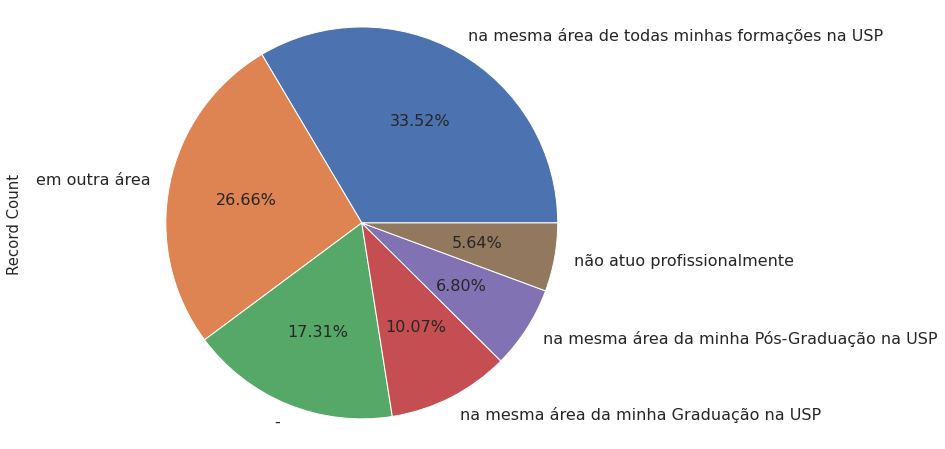

In [74]:
fig = plt.figure(figsize=(12, 8))
area_atuacao_2.plot(kind='pie', autopct='%.2f%%', startangle=0,textprops={'fontsize': 16})
plt.axis('equal') 

#**O oitavo DataFrame é: " Área de Atuação - Empreendedores"**

In [75]:
dados8 = pd.read_csv("Dashboard Alumni USP_Empreendedores_Tabela dinâmica.csv")
dados8

,institution,genre,Record Count
0,Escola Politécnica,Male,547
1,Escola Politécnica,Female,60


In [76]:
empreenda_genre = dados8.groupby(by="genre")['Record Count'].sum().sort_values(ascending=False)

In [77]:
empreenda_genre

genre
Male      547
Female     60
Name: Record Count, dtype: int64

(-1.1069201903527968,
 1.1076129973232858,
 -1.104394781905922,
 1.1002092753288535)

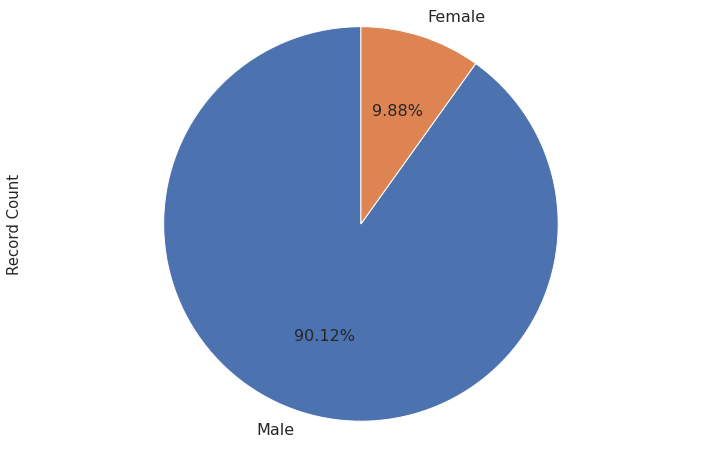

In [78]:
fig = plt.figure(figsize=(12, 8))
empreenda_genre.plot(kind='pie', autopct='%.2f%%', startangle=90,textprops={'fontsize': 16})
plt.axis('equal') 

In [79]:
empreenda = dados8.groupby(by="institution")['Record Count'].sum().sort_values(ascending=False)

In [80]:
empreenda

institution
Escola Politécnica    607
Name: Record Count, dtype: int64

In [81]:
empreenda_ranking = pd.DataFrame()
empreenda_ranking['unidades'] = dados8['institution']
empreenda_ranking['genero'] = dados8['genre']
empreenda_ranking['total'] = dados8['Record Count']
empreenda_ranking = empreenda_ranking.sort_values(['total'],ascending=False)
empreenda_ranking

,unidades,genero,total
0,Escola Politécnica,Male,547
1,Escola Politécnica,Female,60


In [82]:
empreenda_ranking_filtro = pd.DataFrame()
empreenda_ranking_filtro['total'] = empreenda_ranking.groupby(by="unidades", as_index=True)['total'].sum().sort_values(ascending=False)
empreenda_ranking_filtro = empreenda_ranking_filtro[:10]
empreenda_ranking_filtro.reset_index(inplace=True)

In [83]:
empreenda_ranking_filtro

,unidades,total
0,Escola Politécnica,607
